In [2]:
#this set up the graphing configuration 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as graph
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams['font.family'] = "DejaVu Sans"
graph.rcParams['font.size'] = '12'
import pandas as pd 
import statsmodels.formula.api as smf

#import the our new dataset
dataset = pd.read_csv("Data/chocolate data multiple linear regression.txt", index_col=False, sep="\t", header=0)
###
#Replace <printDataHere> with print(data.head())
###
print(dataset.head())

   weight  cocoa_percent   cost  customer_happiness
0     247           0.11   0.25                  29
1     192           0.82  10.44                  29
2     106           0.01   0.00                   6
3      78           0.04   0.01                   4
4     213           0.39   2.56                  30


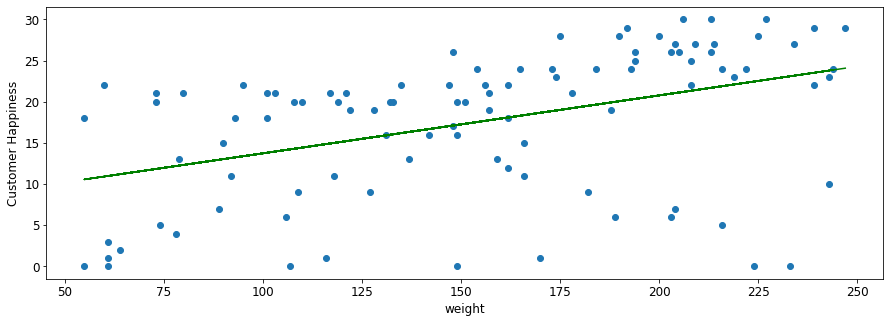

In [15]:
###
# REPLACE <addFeatureHere> BELOW WITH weight
###
formula = 'customer_happiness ~ weight'
###

# This performs linear regression
lm = smf.ols(formula = formula, data = dataset).fit()

featureName = formula.split(" ")[-1]

# Get the data for the x parameter (the feature)
x = dataset[featureName]

#this make and show the graph 
intercept = lm.params[0]
slope = lm.params[1]
line = slope * x + intercept
graph.plot(x, line, '-', c='green')
graph.scatter(x, dataset.customer_happiness)
graph.ylabel('Customer Happiness')
graph.xlabel(featureName)
graph.show()

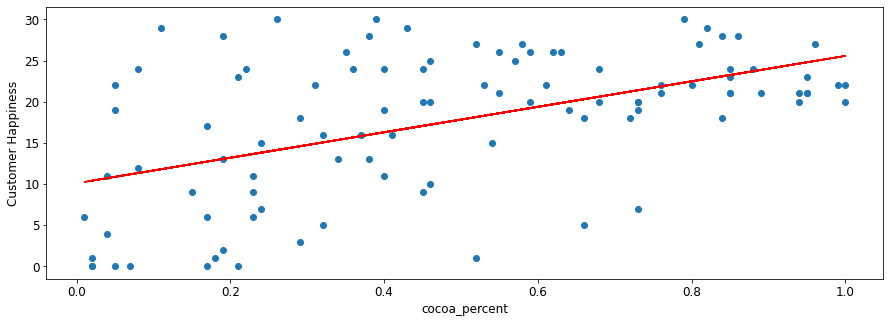

In [17]:
###
# REPLACE <addFeatureHere> BELOW WITH weight
###
formula = 'customer_happiness ~ cocoa_percent'
###

# This performs linear regression
lm = smf.ols(formula = formula, data = dataset).fit()

featureName = formula.split(" ")[-1]

# Get the data for the x parameter (the feature)
x = dataset[featureName]

# This makes and shows a graph
intercept = lm.params[0]
slope = lm.params[1]
line = slope * x + intercept
graph.plot(x, line, '-', c = 'red')
graph.scatter(x, dataset.customer_happiness)
graph.ylabel('Customer Happiness')
graph.xlabel(featureName)
graph.show()

In [20]:
###
#Replace <addfunctionCallHere> below with rsquaredto print the r2 values
###
print(lm.rsquared)

0.2686562634619112


In [24]:
###
# IN THE LINE BELOW REPLACE <addCocoaPercentHere> WITH cocoa_percent AND <addCostPercentHere> WITH cost
###
formula = 'customer_happiness ~ weight + cocoa_percent + cost'
# formula = 'costumer_happiness ~ weight + cocoa_percent + cost'
###

#this create a new model with all three features 
lm = smf.ols(formula = formula, data = dataset).fit()

#print the coefficients (slopes) of our new model
print(lm.params)

print("Rª: "+str(lm.rsquared))

Intercept        -9.338917
weight            0.106411
cocoa_percent    31.935786
cost             -1.314457
dtype: float64
Rª: 0.5554156557713101


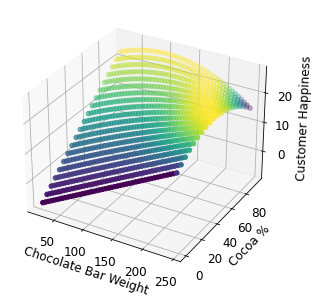

In [26]:
import math
import numpy as np 
from mpl_toolkits.mplot3d import Axes3D

def CalculateCustomerHappiness(weight, cocoa_percent):
    #this calculate the customer happiness for a given bar chocolate 
    cocoa_fraction = cocoa_percent/100
    cost = (weight *0.05 + weight * cocoa_fraction)** 2 * 0.0004

    coeff_intercept = lm.params[0]
    coeff_weight  = lm.params[1]
    coeff_cocoa = lm.params[2]
    coeff_cost = lm.params[3]

    ### 
    # REPLACE THE <addThirdCoefHere> AND <addFourthCoefHere> BELOW WITH THE THIRD AND FOURTH COEFFICIENTS
    # YOU'LL FIND THEM JUST ABOVE THESE COMMENTS!
    # THE FIRST TWO HAVE ALREADY BEEN COMPLETED FOR YOU
    ###
    customer_happiness = (coeff_intercept) + ( weight * coeff_weight) + (cocoa_fraction * coeff_cocoa) + (cost * coeff_cost)
    ###
    return customer_happiness

#Don't edit this part 
def Graph3D():
    #this create a 3d graph of likely customer happiness with different type of chocolate bar
    fig = graph.figure()
    ax = fig.add_subplot(111, projection='3d')

    cocoaPercentages = range(0,100,5)
    for weight in range(20,250,5):
        happiness = []
        for cocoa in cocoaPercentages:
            happiness.append(CalculateCustomerHappiness(weight,cocoa))
        
        ax.scatter(np.full(len(happiness),weight), cocoaPercentages, happiness, c = happiness)
    
    ax.set_xlabel('Chocolate Bar Weight')
    ax.set_ylabel('Cocoa %')
    ax.set_zlabel('Customer Happiness')

    graph.show()

Graph3D()